In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
mnist=keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=3)

Epoch 1/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2310 - accuracy: 0.9320 - val_loss: 0.0927 - val_accuracy: 0.9735
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.0796 - val_accuracy: 0.9757
Epoch 3/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0713 - accuracy: 0.9774 - val_loss: 0.0690 - val_accuracy: 0.9793


In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9771
Test Accuracy = 0.9771000146865845


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

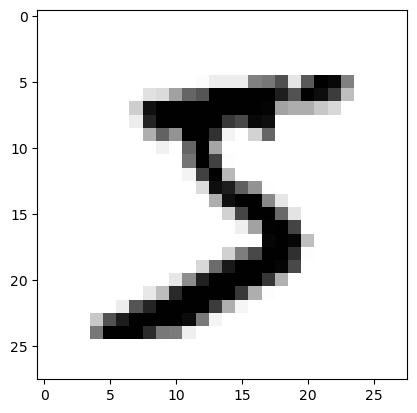

In [13]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

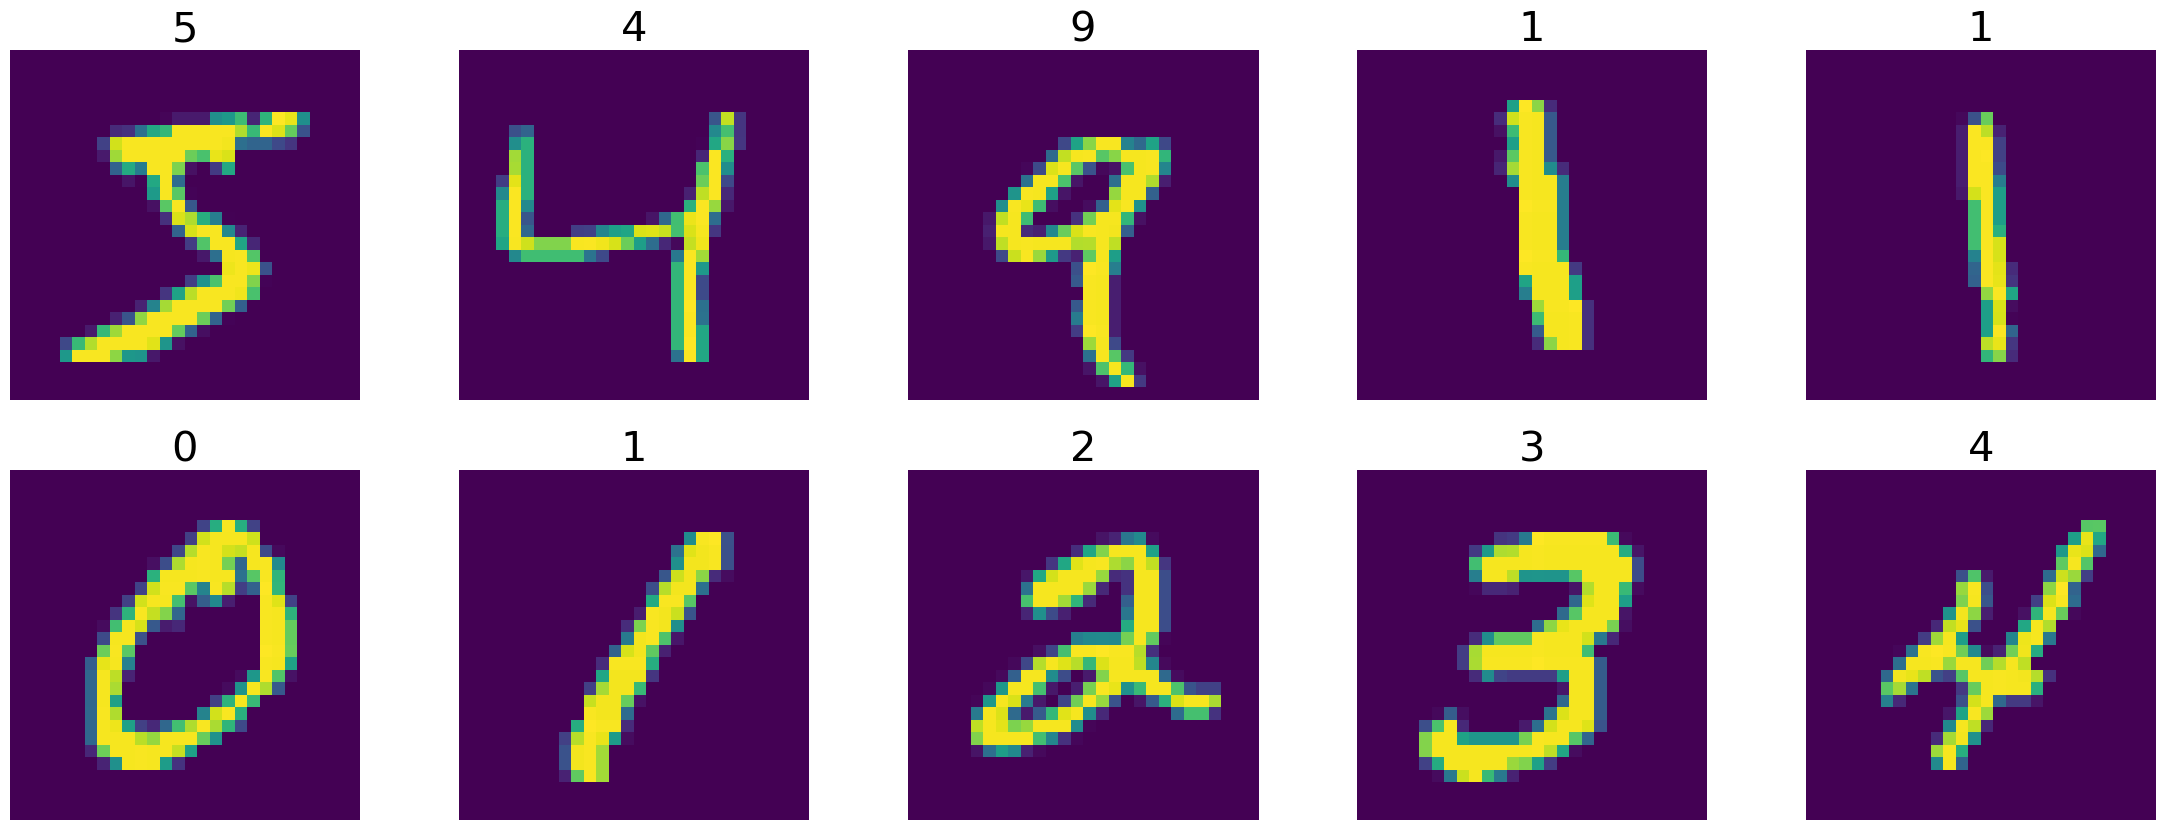

In [31]:
fig,ax=plt.subplots(2,5,figsize=(28,10))
for i in range(0,2):
    for j in range(0,5):
        ax[i,j].imshow(x_train[j+i+j])
        ax[i,j].axis('off')
        ax[i,j].set_title(y_train[j+i+j], fontsize=30)

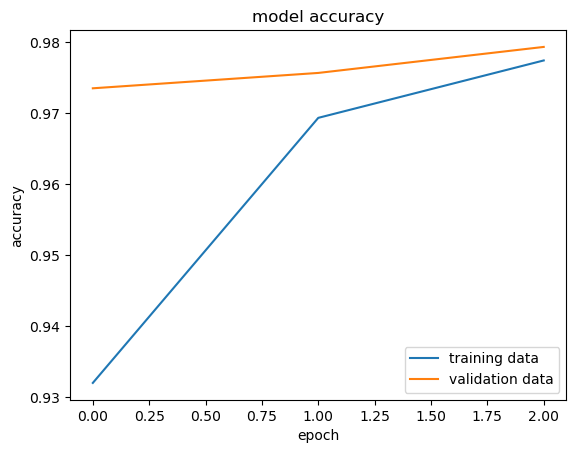

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

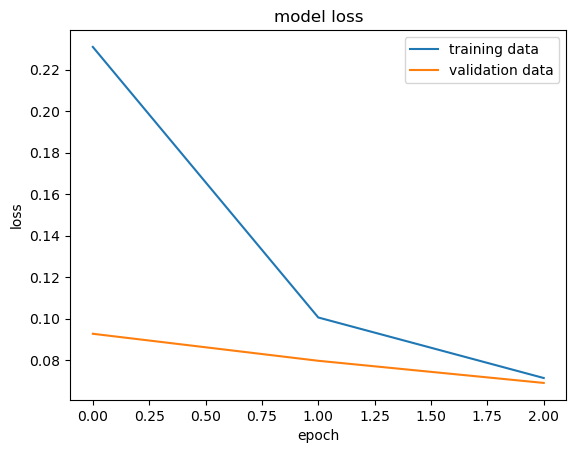

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [19]:
model2=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [20]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history2=model2.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 9s 4ms/step - loss: 0.3206 - accuracy: 0.9023 - val_loss: 0.1059 - val_accuracy: 0.9702
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1807 - accuracy: 0.9447 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1443 - accuracy: 0.9554 - val_loss: 0.0850 - val_accuracy: 0.9728
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1290 - accuracy: 0.9589 - val_loss: 0.0754 - val_accuracy: 0.9788
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1157 - accuracy: 0.9644 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1034 - accuracy: 0.9669 - val_loss: 0.0645 - val_accuracy: 0.9798
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0922 - accuracy: 0.9715 - val_loss: 0.0698 - val_accuracy:

In [22]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9771
Test Accuracy = 0.9771000146865845


In [23]:
import matplotlib.pyplot as plt

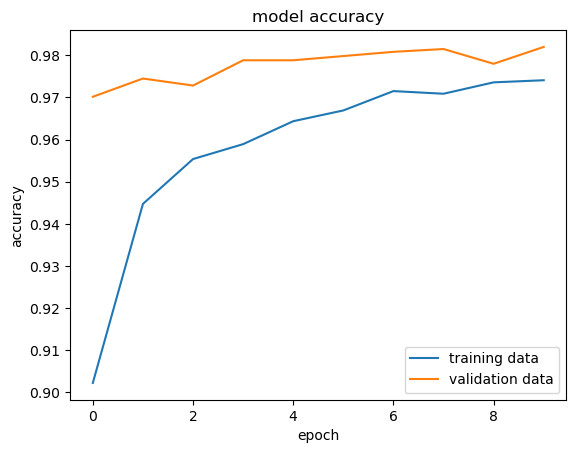

In [24]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

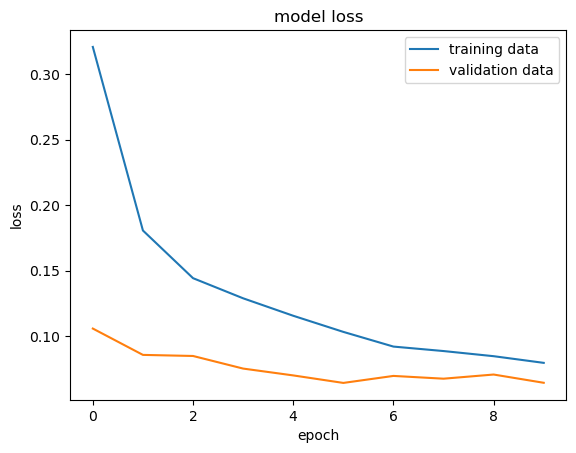

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [36]:
model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.3))

model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dropout(0.3))

model3.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history3=model3.fit(x_train,y_train,validation_split=0.1,epochs=10,verbose=1)

Epoch 1/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0593 - accuracy: 0.9836 - val_loss: 0.0365 - val_accuracy: 0.9923
Epoch 2/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.0399 - val_accuracy: 0.9905
Epoch 3/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0483 - accuracy: 0.9864 - val_loss: 0.0339 - val_accuracy: 0.9927
Epoch 4/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0451 - accuracy: 0.9878 - val_loss: 0.0343 - val_accuracy: 0.9917
Epoch 5/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0403 - accuracy: 0.9883 - val_loss: 0.0390 - val_accuracy: 0.9915
Epoch 6/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0326 - val_accuracy: 0.9918
Epoch 7/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0356 - accuracy: 0.9900 - val_loss: 0.0369 -

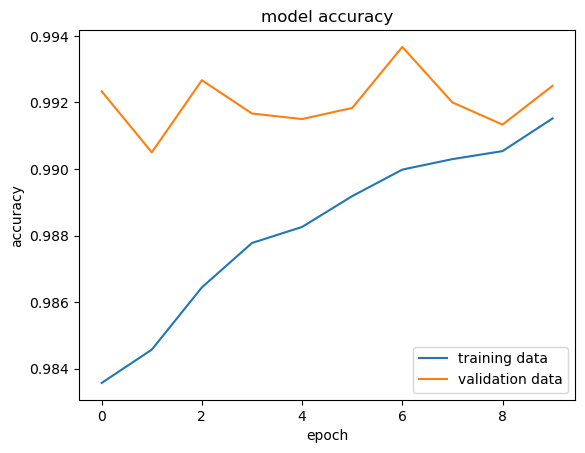

In [45]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

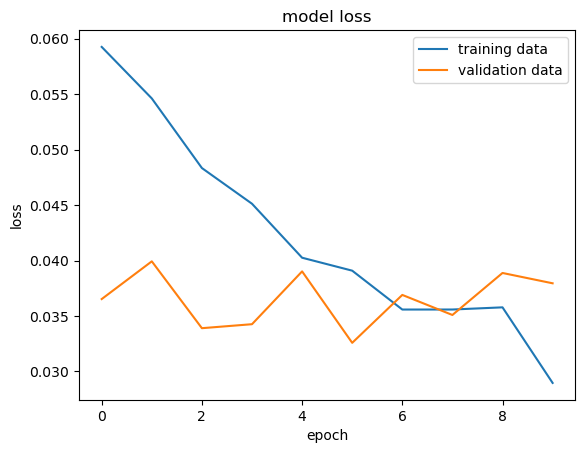

In [44]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')